In [33]:
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


### **Load the dataset**

In [34]:
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
data = pd.read_csv('insurance.csv')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data

--2024-05-20 12:40:50--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.007s  

2024-05-20 12:40:50 (7.14 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.80,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.90,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.00,3,no,northwest,10600.55
1334,18,female,31.90,0,no,northeast,2205.98
1335,18,female,36.90,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.95


### ***Exploratory Data Analysis***

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
data.shape

(1338, 7)

In [37]:
data.describe()

,age,bmi,children,expenses
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.67,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,16.00,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.70,2.00,16639.92
max,64.00,53.10,5.00,63770.43


***Null Values Check***

In [38]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

***Non-null invalid values Check***

In [39]:
data['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [40]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [41]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [42]:
data['expenses'].unique()

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

***Data Preprocessing***

***Encoding for Categorical features***

*Using Label Encoding*

In [43]:
data['sex'] = data['sex'].map({'male' : 0, 'female':1})

In [44]:
data['smoker'] = data['smoker'].map({'no':0, 'yes':1})

*Using one-hot encoding*

In [45]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse = False)
encoded = one_hot_encoder.fit_transform(data[['region']])
region_encoded = pd.DataFrame(encoded, columns=one_hot_encoder.get_feature_names_out(['region']))

data = pd.concat([data, region_encoded], axis=1).drop('region', axis=1)

data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.90,0,1,16884.92,0.00,0.00,0.00,1.00
1,18,0,33.80,1,0,1725.55,0.00,0.00,1.00,0.00
2,28,0,33.00,3,0,4449.46,0.00,0.00,1.00,0.00
3,33,0,22.70,0,0,21984.47,0.00,1.00,0.00,0.00
4,32,0,28.90,0,0,3866.86,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,31.00,3,0,10600.55,0.00,1.00,0.00,0.00
1334,18,1,31.90,0,0,2205.98,1.00,0.00,0.00,0.00
1335,18,1,36.90,0,0,1629.83,0.00,0.00,1.00,0.00
1336,21,1,25.80,0,0,2007.95,0.00,0.00,0.00,1.00


***Using min-max and z-score normalization to normalize the numerical features and label.***

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

min_max_scaler = MinMaxScaler()
data['normalized_age'] = min_max_scaler.fit_transform(data[['age']])

standard_scaler = StandardScaler()
data['normalized_bmi'] = standard_scaler.fit_transform(data[['bmi']])
data['normalized_expenses'] = standard_scaler.fit_transform(data[['expenses']])

In [49]:
data

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest,normalized_age,normalized_bmi,normalized_expenses
0,19,1,27.90,0,1,16884.92,0.00,0.00,0.00,1.00,0.02,-0.45,0.30
1,18,0,33.80,1,0,1725.55,0.00,0.00,1.00,0.00,0.00,0.51,-0.95
2,28,0,33.00,3,0,4449.46,0.00,0.00,1.00,0.00,0.22,0.38,-0.73
3,33,0,22.70,0,0,21984.47,0.00,1.00,0.00,0.00,0.33,-1.31,0.72
4,32,0,28.90,0,0,3866.86,0.00,1.00,0.00,0.00,0.30,-0.29,-0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,31.00,3,0,10600.55,0.00,1.00,0.00,0.00,0.70,0.05,-0.22
1334,18,1,31.90,0,0,2205.98,1.00,0.00,0.00,0.00,0.00,0.20,-0.91
1335,18,1,36.90,0,0,1629.83,0.00,0.00,1.00,0.00,0.00,1.02,-0.96
1336,21,1,25.80,0,0,2007.95,0.00,0.00,0.00,1.00,0.07,-0.80,-0.93


### **Split the data into features(X) and labels(Y)**

In [50]:
X = data.drop(columns = ['age', 'bmi', 'expenses', 'normalized_expenses'])
Y = data[['normalized_expenses']]

In [51]:
X

,sex,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,normalized_age,normalized_bmi
0,1,0,1,0.00,0.00,0.00,1.00,0.02,-0.45
1,0,1,0,0.00,0.00,1.00,0.00,0.00,0.51
2,0,3,0,0.00,0.00,1.00,0.00,0.22,0.38
3,0,0,0,0.00,1.00,0.00,0.00,0.33,-1.31
4,0,0,0,0.00,1.00,0.00,0.00,0.30,-0.29
...,...,...,...,...,...,...,...,...,...
1333,0,3,0,0.00,1.00,0.00,0.00,0.70,0.05
1334,1,0,0,1.00,0.00,0.00,0.00,0.00,0.20
1335,1,0,0,0.00,0.00,1.00,0.00,0.00,1.02
1336,1,0,0,0.00,0.00,0.00,1.00,0.07,-0.80


In [52]:
Y

,normalized_expenses
0,0.30
1,-0.95
2,-0.73
3,0.72
4,-0.78
...,...
1333,-0.22
1334,-0.91
1335,-0.96
1336,-0.93


***Split the data into train and test (80-20)***

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train

,sex,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,normalized_age,normalized_bmi
560,1,2,0,0.00,1.00,0.00,0.00,0.61,-1.75
1285,1,0,0,1.00,0.00,0.00,0.00,0.63,-1.04
1142,1,0,0,0.00,0.00,1.00,0.00,0.74,-0.95
969,1,5,0,0.00,0.00,1.00,0.00,0.46,0.60
486,1,3,0,0.00,1.00,0.00,0.00,0.78,-1.50
...,...,...,...,...,...,...,...,...,...
1095,1,4,0,1.00,0.00,0.00,0.00,0.00,0.12
1130,1,5,0,0.00,0.00,1.00,0.00,0.46,-1.11
1294,0,0,0,1.00,0.00,0.00,0.00,0.87,-0.90
860,1,2,1,0.00,0.00,0.00,1.00,0.41,2.78


In [54]:
X_test

,sex,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,normalized_age,normalized_bmi
764,1,2,0,1.00,0.00,0.00,0.00,0.59,-0.90
887,1,0,0,0.00,1.00,0.00,0.00,0.39,-0.11
890,1,0,1,0.00,1.00,0.00,0.00,1.00,-0.62
1293,0,3,0,0.00,1.00,0.00,0.00,0.61,-0.81
259,0,0,1,0.00,1.00,0.00,0.00,0.02,0.20
...,...,...,...,...,...,...,...,...,...
109,0,0,1,0.00,0.00,1.00,0.00,0.98,0.73
575,1,0,0,0.00,1.00,0.00,0.00,0.87,-0.57
535,0,1,0,1.00,0.00,0.00,0.00,0.43,-0.44
543,1,0,1,0.00,0.00,1.00,0.00,0.78,2.75


In [55]:
Y_train

,normalized_expenses
560,-0.34
1285,-0.39
1142,1.14
969,-0.39
486,-0.07
...,...
1095,-0.72
1130,-0.39
1294,-0.11
860,2.71


In [56]:
Y_test

,normalized_expenses
764,-0.34
887,-0.66
890,1.33
1293,-0.33
259,1.69
...,...
109,2.79
575,-0.09
535,-0.60
543,4.17


### **Linear Regression Model**

In [69]:
#Define the linear regression model

model = keras.Sequential([                              #Sequential - Linear stack of layers
      layers.Dense(                                     #Densely connected
          units=1,                                      #one output - single continuous value
          input_shape=[X_train.shape[1]])               #Number of input features
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:

model.compile(keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])


***Train the model with epochs 100 and learning rate of 0.1***

In [71]:
model.fit(X_train, Y_train, epochs=100, verbose=0)

***Evaluate the Model***

9/9 - 0s - loss: 0.3310 - mean_absolute_error: 0.5047 - mean_squared_error: 0.3310 - 74ms/epoch - 8ms/step
Testing set Mean Abs Error:  0.50 expenses
9/9 [==============================] - 0s 2ms/step


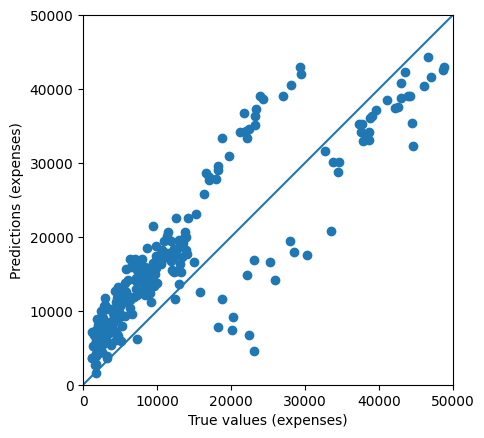

In [73]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.

loss, mae, mse = model.evaluate(X_test, Y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

#Invert the normalized target variable
Y_test_original = standard_scaler.inverse_transform(Y_test).flatten()

# Plot predictions.
test_predictions = model.predict(X_test).flatten()

#Invert the normalized predictions
test_predictions_original = standard_scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()

a = plt.axes(aspect='equal')
plt.scatter(Y_test_original, test_predictions_original)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)